In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob


In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-bush.tgz
!tar -xvf "/content/lfw-bush.tgz" -C '/content/'

In [3]:
dir='/content/lfw/George_W_Bush'
dataset=glob.glob(dir+"/*.jpg")
print(len(dataset))

530


(250, 250)


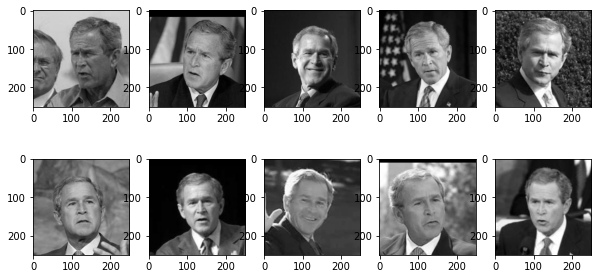

In [64]:

images=[np.array(Image.open(file).convert("L")) for file in dataset]
images_1d=[image.reshape(-1)/255 for image in images]
print(images[0].shape)


plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images[i],cmap="gray")
plt.show()

# **Algorithm**

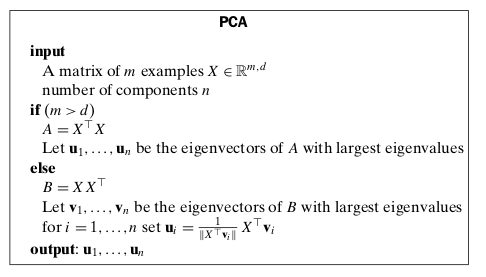

In [68]:
def find_principle_components(A,ncomp):
    e_val,e_vec=np.linalg.eig(A)
    temp=[[i,j] for i,j in zip(e_val,e_vec.tolist())]
    temp_decending=sorted(temp,key=lambda x:x[0],reverse=True)

    principle_components=temp_decending[:ncomp]
    
    error=0
    for e_val,e_vec in temp_decending[ncomp:]:
        error+=e_val
    return principle_components,error

def compression(X,ncomp):
    U=[]
    x1,x2=X.shape
    if x1>x2:
        A=np.matmul(np.transpose(X),X)
        principle_components,error=find_principle_components(A,ncomp)
        for e_val,e_vec in principle_components:
            U.append(e_vec)
    else:
        A=np.matmul(X,np.transpose(X)) 
        principle_components,error=find_principle_components(A,ncomp)
        for e_val,e_vec in principle_components:
            x=np.matmul(np.transpose(X),e_vec)
            U.append(x/np.linalg.norm(x))
      
    U=np.transpose(U)
    W=np.transpose(U) 
    reduced_im=np.matmul(X,U)
    recons_img=np.matmul(reduced_im,W)

    return recons_img,error

# recons_img,error=compression(np.array(images_1d),100)
# plt.imshow(recons_img[0].reshape(250,250),cmap="gray")
# plt.show()

Reconstructed Image from 100 principle components 


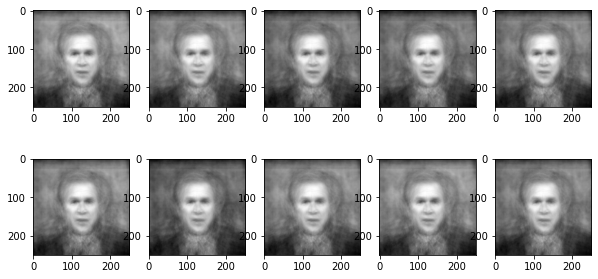

Reconstructed Image from 500 principle components 


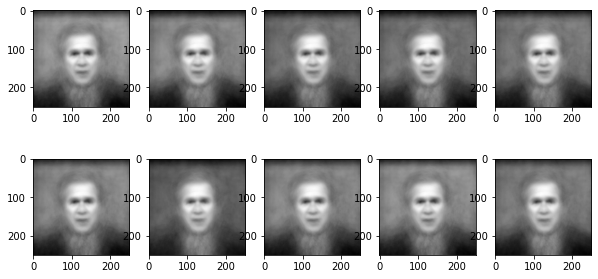

Reconstructed Image from 1000 principle components 


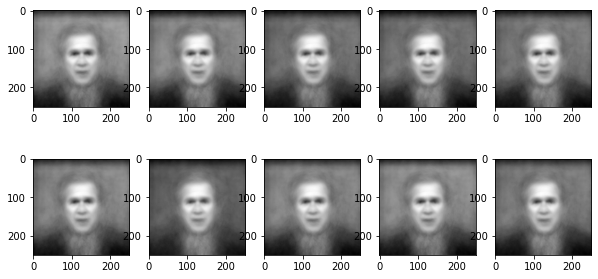

Reconstructed Image from 10000 principle components 


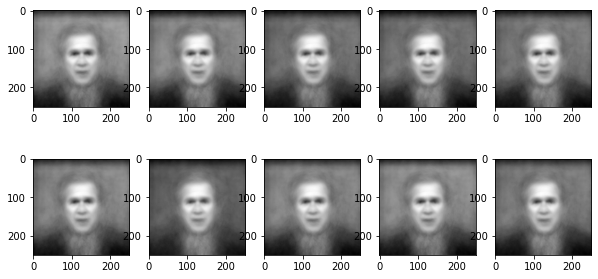

In [62]:

components=[100,500,1000,10000]
errors=[]
for ncomp in components:
    recons_img,err=compression(np.array(images_1d),ncomp)
    errors.append(err)
    image2=[]
    for img in recons_img.tolist(): 
        image2.append(np.array(img).reshape(250,250))

    print("Reconstructed Image from %d principle components "%ncomp) 
    plt.figure(figsize=(10,5))   
    for idx,img in enumerate(image2[:10]):
        plt.subplot(2,5,idx+1)
        plt.imshow(img,cmap="gray")
    plt.show()
